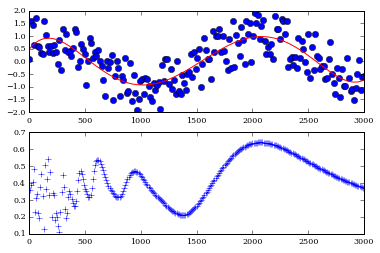

[0.005179593305109309, 0.78400609761789219, 0.68879152840461044, 0, 0.73902839986176172, 0, 0, 0.43849692061735251, 0.56273686177611104, 0.53772228684144285, 0, 0.0930971834323151, 0.1442915386184313, 0, 0.10189881022429087, 0.19205468833389711, 0.045284476209936142, 0.63440370303334814, 0, 1.0337877572534557, 0.090297715996535854, 0, 0.29734789926135974, 0.17926568605185317, 0.0309944761608969, 0.00077323023239478372, 0, 0.78666823863782587, 0.51669358239698759, 0.27751072583509639, 0, 0, 0.10516640977964981, 0, 0.76796033829878041, 0, 0.46206714328156634, 0.27152895356469609, 0, 0.50563380775922484, 0, 0.62750113464476387, 0, 0, 0.2224085252352318, 0.93964220107468377, 0.24103131781966997, 0, 0.20687305779639853, 0.39630661450131288, 0.69522281831353294, 0, 0.35729445207023164, 0.28729939700795415, 0.32378551491750229, 0.1693341465764161, 0.041665860678033406, 0.77984216179235766, 0, 0.15134105921083768, 0.34722456457553474, 0.25079369884162783, 0, 0.16019563057415542, 0.575801625341

In [27]:
%matplotlib inline
#code goes here
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate Data

x = np.linspace(0, 3000, num=200, endpoint=True)
y = np.cos(x*0.003)
for i in range(len(y)):
    r = np.random.random()
    if r < 0.5:
        y[i] -= np.random.random()
    else:
        y[i] += np.random.random()

period = np.array([i for i in range(10,3000,10)])
omega = 2 * np.pi / period
yerr = [np.random.random()/2 for i in y]

PS = lomb_scargle(x, y, yerr, omega, generalized=True)

p = np.poly1d(np.polyfit(x,y,5))
xp = np.arange(0,3000,1)

#calculate y difference
dy = []
for i in range(len(y)):
    dy.append(abs(y[i]-p(x[i])))
    if dy[i] < yerr[i]:
        dy[i] = 0
    else:
        dy[i] -= yerr[i]

plt.subplot(211)
plt.plot(x, y, 'o',xp,p(xp),'r-')
plt.ylim((-2,2))

plt.subplot(212)
plt.plot(period,PS,'+')

plt.show()